Rename your notebooks in this format: <b>StudentNumber_EDA</b>

For example: <b>2018160307_EDA</b>

Set your kernel to private prior to the deadline (to avoid other students copying).

Set it to public after the deadline (to allow us to check your codes).

This kernel is divided into tasks by headers. Each cell is commented with the specific required task.
Copy and edit this kernel. Do not delete pre-writen comments. Just insert your code.
As much as possible, write comments in your code.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries and packages
import numpy as np # for array manipulations
import pandas as pd # for reading data/dataframes
import os # for directory
from matplotlib import pyplot as plt # for visualization
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

# Use seaborn style to make visualization prettier
plt.style.use('seaborn')

In [ ]:
# Get paths of datasets to be used for EDA
eda_root = '/content/drive/My Drive/archive'
eda_paths = sorted([os.path.join(eda_root, x) for x in os.listdir(eda_root)])
for path in eda_paths:
    print(path)

/content/drive/My Drive/archive/Case.csv
/content/drive/My Drive/archive/PatientInfo.csv
/content/drive/My Drive/archive/Policy.csv
/content/drive/My Drive/archive/Region.csv
/content/drive/My Drive/archive/SearchTrend.csv
/content/drive/My Drive/archive/SeoulFloating.csv
/content/drive/My Drive/archive/Time.csv
/content/drive/My Drive/archive/TimeAge.csv
/content/drive/My Drive/archive/TimeGender.csv
/content/drive/My Drive/archive/TimeProvince.csv
/content/drive/My Drive/archive/Weather.csv


### Task 1: Age

In [ ]:
age_csv = pd.read_csv(eda_paths[7]) # read the data

# show first few rows
age_csv.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [ ]:
# show the basic statistics for the confirmed and deceased cases
age_csv.describe().drop(columns=['time'])[1:] # remove time and don't show count

,confirmed,deceased
mean,1158.129477,23.419651
std,822.619497,37.387911
min,32.000000,0.000000
25%,530.000000,0.000000
50%,1052.000000,3.000000
75%,1537.000000,35.000000
max,3362.000000,139.000000


In [ ]:
# It's optional to print the answers to the questions, but for the sake of demonstration:
# Q1
# check for missing values
# isnull() returns a boolean value in each cell indicating whether there is a missing or NaN value
# one way to check if the dataframe has any missing value at all, we can use numpy's unique function
A1 = 0 if True not in np.unique(age_csv.isnull().values) else 1
print('Answer to Q1:', A1)
# the result means that there are no missing values since only False is the unique value in all cells

# Q2
# there can be many ways of arriving to the answer
# just showing two
print('Answer to Q2:', len(age_csv))
print('Answer to Q2:', age_csv.shape[0])

# Q3
# again, there can be many ways of arriving to the answer
# just showing two
print('Answer to Q3:', len(age_csv.columns))
print('Answer to Q3:', age_csv.shape[1])

#Q4
# checking for the number of unique values in a column
print('Answer to Q4:', age_csv['age'].nunique())

# convert date column from string to datetime
age_csv['date'] = pd.to_datetime(age_csv['date']) # already in a good format

# get the start date
start_date = age_csv['date'].min()
# get the end date
end_date = age_csv['date'].max()
# get the total number of days from start to end
print('Answer to Q5:', end_date-start_date)

Answer to Q1: 0
Answer to Q2: 1089
Answer to Q2: 1089
Answer to Q3: 5
Answer to Q3: 5
Answer to Q4: 9
Answer to Q5: 120 days 00:00:00


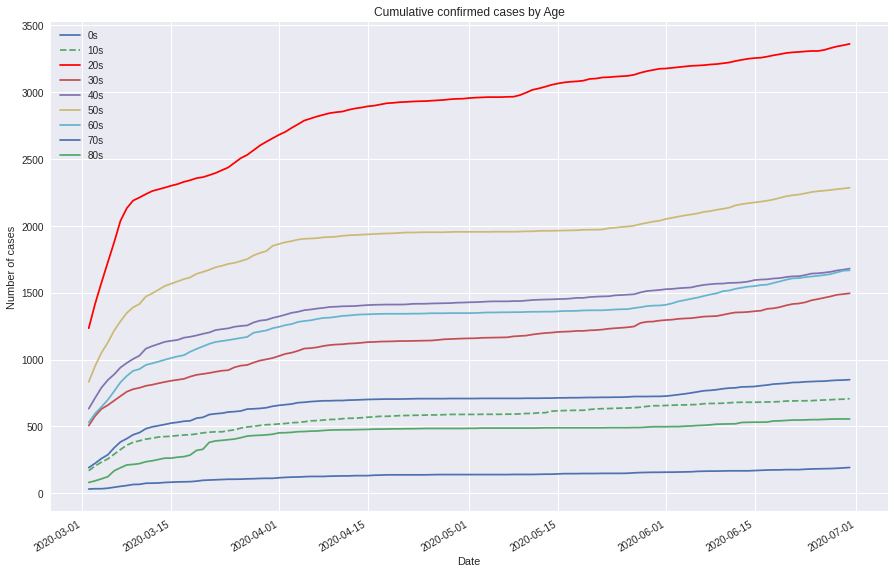

In [ ]:
fig = plt.figure(figsize=(15,10)) # set the image size
# set the title
plt.title('Cumulative confirmed cases by Age')
# plot for each age group
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '0s'], label='0s')
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '10s'], label='10s', linestyle='--') # change line style
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '20s'], label='20s', color='red') # change color
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '30s'], label='30s')
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '40s'], label='40s')
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '50s'], label='50s')
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '60s'], label='60s')
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '70s'], label='70s')
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '80s'], label='80s')
# show the legend
plt.legend()
# add axis labels
plt.xlabel('Date')
plt.ylabel('Number of cases')
# rotate the dates for better visibility
plt.gcf().autofmt_xdate()
# show the plot
plt.show()

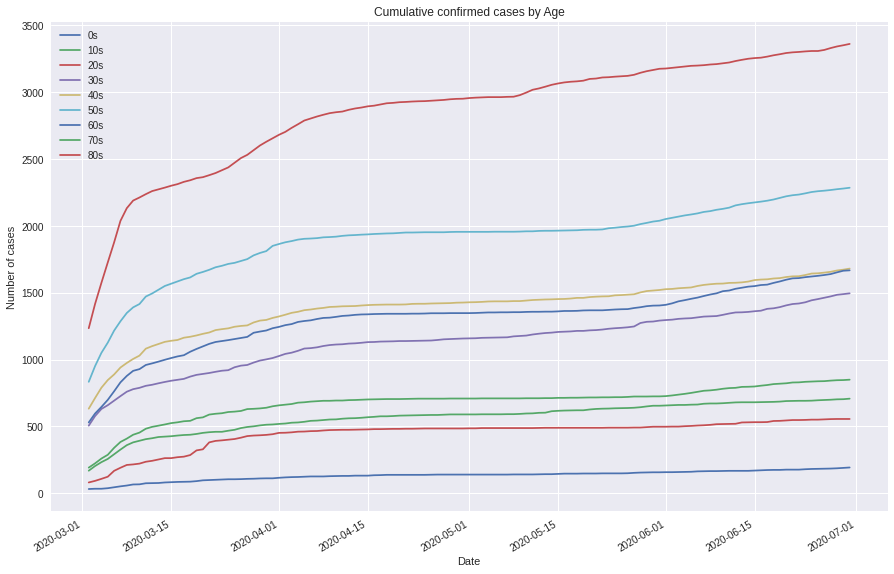

In [ ]:
# here is another way you can plot

fig = plt.figure(figsize=(15,10)) # set the image size
# set the title
plt.title('Cumulative confirmed cases by Age')

# loop over the age groups
for x in age_csv.age.unique():
    plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == x], label=x)

# show the legend
plt.legend()
# add axis labels
plt.xlabel('Date')
plt.ylabel('Number of cases')
# rotate the dates for better visibility
plt.gcf().autofmt_xdate()
# show the plot
plt.show()

# you can also make your own plotting funciton

In [ ]:
# answers to Q6 and Q7 can be eye-balled from the plot
print('Answer to Q6:', 2)
print('Answer to Q7:', 1500)

Answer to Q6: 2
Answer to Q7: 1500


In [ ]:
total_deceased = [] # get the total number of deceased
age_groups = age_csv.age.unique() # get the unique values under the age column
for x in age_groups:
    total_deceased.append(age_csv[age_csv['age']==x]['deceased'].max())

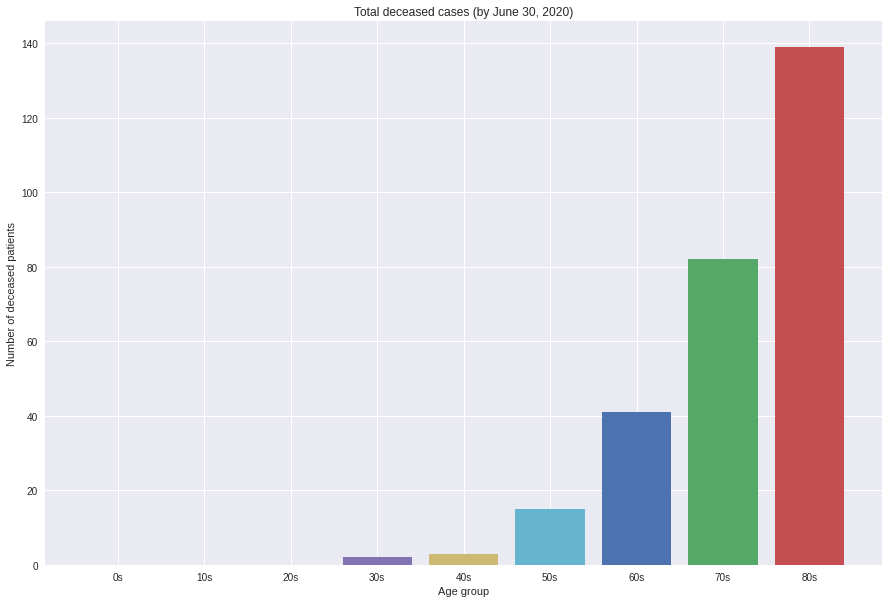

In [ ]:
# plot a bar graph for the deceased cases
fig = plt.figure(figsize=(15,10))
plt.bar(age_groups, total_deceased, color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'])
plt.title('Total deceased cases (by June 30, 2020)')
plt.xlabel('Age group')
plt.ylabel('Number of deceased patients')
plt.show()

In [ ]:
# again, answers to Q8 and Q9 can be eye-balled from the plot
print('Answer to Q8:',)
print('Answer to Q9:',)
age_csv['']

Answer to Q8:
Answer to Q9:


You can use matplotlib to create different kinds of plots. See [this page](https://matplotlib.org/tutorials/introductory/sample_plots.html) for more details.

### Task 2: Region

In [ ]:
region_csv = pd.read_csv(eda_paths[9]) # read the data

# show first few rows
region_csv.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [ ]:
# Q10
# What is the highest number of confirmed cases?

In [ ]:
confirmed_max = region_csv['confirmed'].max() # maximum nuber in column 'confirmed'
print(confirmed_max)

6906


In [ ]:
# Q11
# What is the average number of released patients? (round to the nearest whole number)

In [ ]:
region_csv.describe()

,time,confirmed,released,deceased
count,2771.000000,2771.000000,2771.000000,2771.000000
mean,4.122699,444.308192,320.726453,9.239986
std,6.998873,1360.890963,1126.041255,32.638615
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,1.000000,0.000000
50%,0.000000,42.000000,21.000000,0.000000
75%,16.000000,133.000000,92.000000,1.000000
max,16.000000,6906.000000,6700.000000,189.000000


In [ ]:
released_mean = region_csv['released'].mean() # mean number about released value
round(released_mean) # round to the nearest whole number

321

In [ ]:
# Q12
# How many regions/provinces were included in the data?

In [ ]:
provinces = region_csv['province'].unique() # array about unique value in column 'province'
provinces

array(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [ ]:
len(provinces) # length of array provinces

17

In [ ]:
# Q13 
# Rank the regions/provinces in descending order based on the total number of cases by the end of June. What is the position of Seoul in this ranking?

In [ ]:
region_csv.loc[region_csv['date'] == '2020-06-30'] # data in 2020-06-30
region_last = region_csv.loc[region_csv['date'] == '2020-06-30']; region_last 

,date,time,province,confirmed,released,deceased
2754,2020-06-30,0,Seoul,1312,985,7
2755,2020-06-30,0,Busan,154,142,3
2756,2020-06-30,0,Daegu,6906,6700,189
2757,2020-06-30,0,Incheon,341,290,1
2758,2020-06-30,0,Gwangju,44,32,0
2759,2020-06-30,0,Daejeon,117,44,1
2760,2020-06-30,0,Ulsan,55,50,1
2761,2020-06-30,0,Sejong,50,47,0
2762,2020-06-30,0,Gyeonggi-do,1207,931,23
2763,2020-06-30,0,Gangwon-do,65,54,3


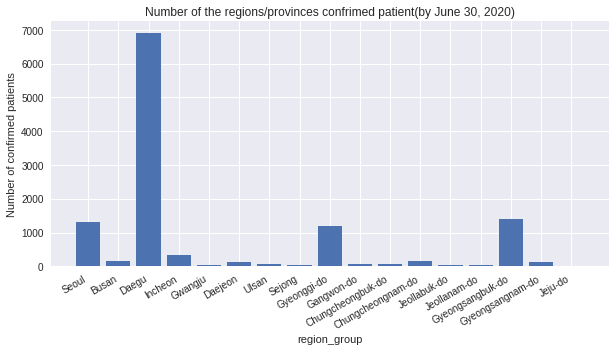

In [ ]:
region_group = region_csv.province.unique() # a bar graph of Number of the regions/provinces confrimed patient(by June 30, 2020)
fig = plt.figure(figsize=(10,5))
plt.bar(region_group, region_last.confirmed)
plt.title('Number of the regions/provinces confrimed patient(by June 30, 2020)')
plt.xlabel('region_group')
plt.ylabel('Number of confirmed patients')
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
# add column 'rank' to see the rank of confirmed number of each region/province
region_last['rank'] = region_last['confirmed'].rank(ascending = False); region_last.drop(columns=['time', 'province', 'date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,confirmed,released,deceased,rank
2754,1312,985,7,3.0
2755,154,142,3,7.0
2756,6906,6700,189,1.0
2757,341,290,1,5.0
2758,44,32,0,14.0
2759,117,44,1,9.0
2760,55,50,1,12.0
2761,50,47,0,13.0
2762,1207,931,23,4.0
2763,65,54,3,10.5


In [ ]:
# Q14
# Based on the Q13, what percentage is Seoul's proportion to the against the total number of confirmed cases? (round to the nearest hundredths)

In [ ]:
region_last.index = region_last['province']
region_last.drop(columns=['time', 'province', 'date'])

,confirmed,released,deceased,rank
province,,,,
Seoul,1312,985,7,3.0
Busan,154,142,3,7.0
Daegu,6906,6700,189,1.0
Incheon,341,290,1,5.0
Gwangju,44,32,0,14.0
Daejeon,117,44,1,9.0
Ulsan,55,50,1,12.0
Sejong,50,47,0,13.0
Gyeonggi-do,1207,931,23,4.0


In [ ]:
# confirmed number in seoul(by end of june) / whole confirmed number(by end of june) * 100
seoul_ratio = region_last.confirmed.loc['Seoul'] / region_last.confirmed.sum() * 100
round(seoul_ratio, 2) #round to the nearest hundredths

10.86

In [ ]:
# Q15 
# How many were the confirmed cases in Daegu by February 27?

In [ ]:
region_0227 = region_csv.loc[region_csv['date'] == '2020-02-27'] # extract data in '2020-02-27'
region_0227

,date,time,province,confirmed,released,deceased
646,2020-02-27,16,Seoul,56,8,0
647,2020-02-27,16,Busan,61,0,0
648,2020-02-27,16,Daegu,1132,2,6
649,2020-02-27,16,Incheon,3,1,0
650,2020-02-27,16,Gwangju,9,2,0
651,2020-02-27,16,Daejeon,9,0,0
652,2020-02-27,16,Ulsan,11,0,0
653,2020-02-27,16,Sejong,1,0,0
654,2020-02-27,16,Gyeonggi-do,62,8,1
655,2020-02-27,16,Gangwon-do,6,0,0


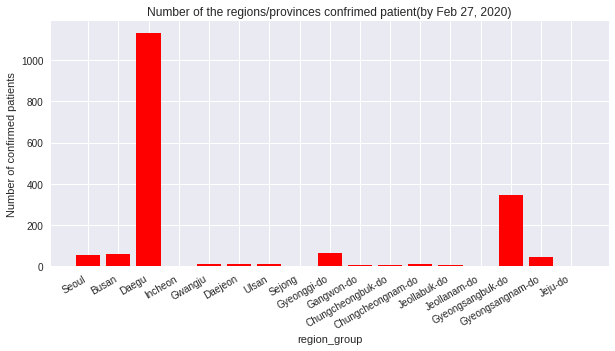

In [ ]:
region_group = region_csv.province.unique() # a bar graph of Number of the regions/provinces confrimed patient(by June 30, 2020)
fig = plt.figure(figsize=(10,5))
plt.bar(region_group, region_0227.confirmed, color='red')
plt.title('Number of the regions/provinces confrimed patient(by Feb 27, 2020)')
plt.xlabel('region_group')
plt.ylabel('Number of confirmed patients')
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
region_0227.confirmed.loc[region_0227['province'] == 'Daegu'] # confirmed number in Daegu by end of June

648    1132
Name: confirmed, dtype: int64

In [ ]:
# Q16 
# Which month did the curve for confirmed cases start flattening in Daegu? (0-Jan, 1-Feb, 2-Mar, 3-Apr, 4-May, 5-Jun)

In [ ]:
region_csv['date'] = pd.to_datetime(region_csv['date']) # change the data type of a column 'date' to datetime

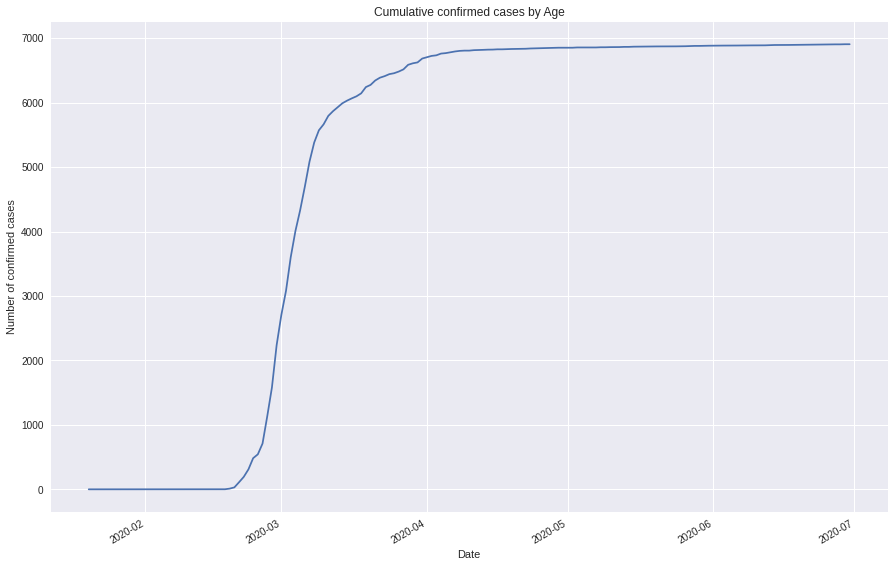

In [ ]:
fig = plt.figure(figsize=(15,10)) # set the image size
# set the title
plt.title('Cumulative confirmed cases by Age')
# plot Daegu
plt.plot('date', 'confirmed', data=region_csv[region_csv['province'] == 'Daegu'], label='Daegu')
# add axis labels
plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
# rotate the dates for better visibility
plt.gcf().autofmt_xdate()
# show the plot
plt.show()
# in this plot graph, we can see which month did the curve for confirmed cases start flattening in Daegu.

In [ ]:
# Q17
# On what day in the month of May has Seoul released a total of 508 patients?

In [ ]:
region_508 = region_csv.loc[region_csv['province'] == 'Seoul']
region_508.loc[region_508['released'] == 508]

,date,time,province,confirmed,released,deceased
1836,2020-05-07,0,Seoul,637,508,2


### Task 3: Gender

In [ ]:
gender_csv = pd.read_csv(eda_paths[8]) # read the data

# show first few rows
gender_csv.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [ ]:
# Q18 
# What percentage of the confirmed cases were females by the end of June? (round to the nearest hundredths)

In [ ]:
gender_female = gender_csv.loc[gender_csv['sex'] == 'female'] # confirmed cases number of females by the end of June
gender_female.confirmed.max()

7305

In [ ]:
gender_all = gender_csv[gender_csv['date'] == '2020-06-30'].confirmed.sum() # confirmed cases number of both females and males

In [ ]:
gender_female.confirmed.max() / gender_all * 100 # percentage of the confirmed cases were females by the end of June

57.0703125

In [ ]:
round(gender_female.confirmed.max() / gender_all * 100, 2) # round to the nearest hundredths

57.07

In [ ]:
# Q19 
# What percentage of the confirmed cases were males by the end of June? (round to the nearest hundredths)

In [ ]:
gender_male = gender_csv.loc[gender_csv['sex'] == 'male'] # confirmed cases number of males by the end of June
gender_male.confirmed.max()

5495

In [ ]:
round(gender_male.confirmed.max() / gender_all * 100, 2) # round to the nearest hundredths

42.93

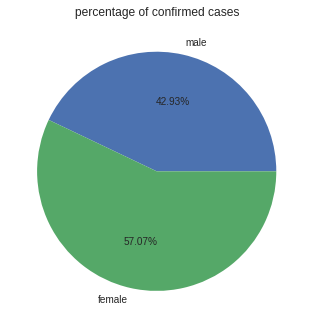

In [ ]:
x = ['male', 'female']
y = [gender_male.confirmed.max(), gender_female.confirmed.max()]

plt.pie(y, labels=x, autopct='%.2f%%')
plt.title('percentage of confirmed cases')
plt.show()

In [ ]:
# Q20 
# What percentage of the deceased cases were females by the end of June? (round to the nearest hundredths)

In [ ]:
gender_female = gender_csv.loc[gender_csv['sex'] == 'female'] # confirmed cases number of females by the end of June
gender_female.deceased.max()

131

In [ ]:
deceased_all = gender_csv[gender_csv['date'] == '2020-06-30'].deceased.sum(); deceased_all

282

In [ ]:
gender_female.deceased.max() / deceased_all * 100

46.45390070921986

In [ ]:
round(gender_female.deceased.max() / deceased_all * 100, 2)

46.45

In [ ]:
# Q21 
# What percentage of the deceased cases were males by the end of June? (round to the nearest hundredths)

In [ ]:
gender_male = gender_csv.loc[gender_csv['sex'] == 'male'] # confirmed cases number of males by the end of June
gender_male.deceased.max()

151

In [ ]:
gender_male.deceased.max() / deceased_all * 100

53.54609929078015

In [ ]:
round(gender_male.deceased.max() / deceased_all * 100, 2)

53.55

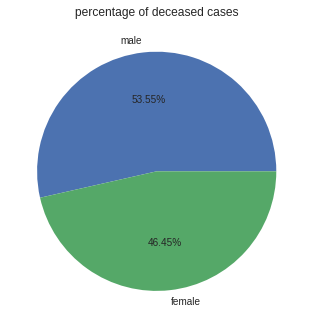

In [ ]:
x = ['male', 'female']
y = [gender_male.deceased.max(), gender_female.deceased.max()]

plt.pie(y, labels=x, autopct='%.2f%%')
plt.title('percentage of deceased cases')
plt.show()

### Task 4: Path

In [ ]:
path_csv = pd.read_csv(eda_paths[0]) # read the data

# show first few rows
path_csv.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [ ]:
# Q22 
# How many unique sources (path) of the confirmed cases were identified?

In [ ]:
len(path_csv['infection_case'].unique())

81

In [ ]:
# Q23 
# What percentage of the confirmed cases by the end of June is attributed to Shincheonji Church in Daegu? (round to the nearest hundredths)

In [ ]:
path_csv.confirmed.sum()

11395

In [ ]:
daegu_scj = path_daegu.loc[path_daegu['infection_case'] == 'Shincheonji Church'].confirmed; daegu_scj

province
Daegu    4511
Name: confirmed, dtype: int64

In [ ]:
round(daegu_scj/ path_csv.confirmed.sum() * 100, 2)

province
Daegu    39.59
Name: confirmed, dtype: float64

In [ ]:
# Q24 
# What percentage of the confirmed cases by the end of June is attributed to Overseas Inflow in Seoul? (round to the nearest hundredths)

In [ ]:
path_csv.confirmed.sum()

11395

In [ ]:
path_seoul.confirmed.loc[path_seoul['infection_case'] == 'overseas inflow']

province
Seoul    298
Name: confirmed, dtype: int64

In [ ]:
round(298 / path_csv.confirmed.sum() * 100, 2)

2.62

In [ ]:
# Q25
# What percentage of the confirmed cases by the end of June is transmitted through group contact? (round to the nearest hundredths)

In [ ]:
path_csv.confirmed.loc[path_csv['group'] == 1].sum() # sum of value confirmed number transmitted through group contact

7851

In [ ]:
round(path_csv.confirmed.loc[path_csv['group'] == 1].sum() / path_csv['confirmed'].sum() * 100, 2)

68.9

In [ ]:
# Q26 
# How many cases by the end of June are transmitted by individual contact?

In [ ]:
path_csv.confirmed.loc[path_csv['group'] == 0].sum( )# value of confirmed number transmitted through indivisual contact

3544

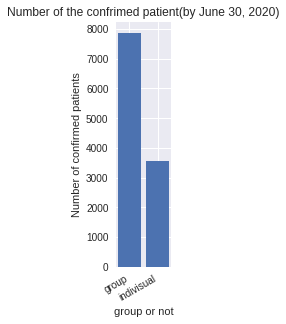

In [ ]:
fig = plt.figure(figsize=(1,5))
plt.bar(['group', 'indivisual'], [path_csv.confirmed.loc[path_csv['group'] == 1].sum(), path_csv.confirmed.loc[path_csv['group'] == 0].sum( )])
plt.title('Number of the confrimed patient(by June 30, 2020)')
plt.xlabel('group or not')
plt.ylabel('Number of confirmed patients')
plt.gcf().autofmt_xdate()
plt.show()

### Task 5: Weather

In [ ]:
# load/read the data
# drop missing values (Null/NaN)
# correct misspelled value under the provinces column
# create appropriate plots

In [ ]:
weather_csv = pd.read_csv(eda_paths[10]) # read the data

# show first few rows
weather_csv.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


In [ ]:
# Q27 
# How many cells have missing values (Null/NaN)?

In [ ]:
missing = weather_csv.isna().sum().sum(); missing

81

In [ ]:
# Q28
# After dropping the entries with missing values, what is the total number of entries left in the data?

In [ ]:
weather_drop = weather_csv.dropna(); weather_drop.shape[0]

26224

In [ ]:
# Q29
# Under the provinces column, there is one misspelled entry. After correcting this mistake, how many unique values are under this column?

In [ ]:
weather_csv['province'].unique() # we can see misspelled entry Chunghceongbuk-do'

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do',
       'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do',
       'Chunghceongbuk-do'], dtype=object)

In [ ]:
weather_csv['province'].replace('Chunghceongbuk-do','Chungcheongbuk-do',inplace=True) # replace the mispelled value
weather_csv['province'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do',
       'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'], dtype=object)

In [ ]:
len(weather_csv['province'].unique())

16

In [ ]:
# Q30
# What is the highest average temperature? (round to the nearest tenths)

In [ ]:
weather_csv['avg_temp'].max()

33.9

In [ ]:
# Q31 
# What is the lowest average relative humidity? (round to the nearest tenths)

In [ ]:
weather_csv['avg_relative_humidity'].min()

10.4

### Task 6: Patient

In [ ]:
patient_csv = pd.read_csv(eda_paths[1]) # read the data

# show first few rows
patient_csv.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
# Q32 
# What is the largest number of human contact before a patient is confirmed?

In [ ]:
contact = patient_csv['contact_number']; contact
contact.dropna().max()

1160.0

In [ ]:
# Q33
# How many were non-Korean patients?

In [ ]:
patient_non = patient_csv.loc[patient_csv['country'] != 'Korea']
patient_non.shape[0]

42

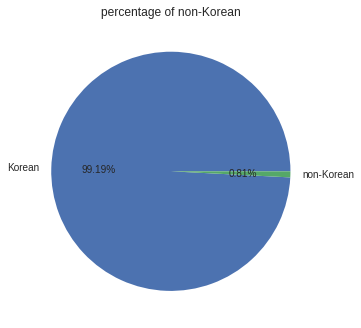

In [ ]:
x = ['Korean', 'non-Korean']
y = [patient_csv.loc[patient_csv['country'] == 'Korea'].shape[0], patient_non.shape[0]]

plt.pie(y, labels=x, autopct='%.2f%%')
plt.title('percentage of non-Korean')
plt.show()

### Task 7: Search

In [ ]:
search_csv = pd.read_csv(eda_paths[4]) # read the data

# show first few rows
search_csv.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [ ]:
# Q34 
# How many topics related to respiratory diseases were included in this data?

In [ ]:
# cold, flu, pneumonia, coronavirus

In [ ]:
# Q35
# How many days were included from the start to the end of the time series?

In [ ]:
search_csv.shape[0]

1642

In [ ]:
# Q36
# How many days after the first case in Korea did the search trend for coronavirus reached 100% interest?

In [ ]:
search_csv.loc[search_csv['coronavirus']==100].date # the day occured first case in korea : 2020-01-23

1483    2020-01-23
Name: date, dtype: object

### Task 8: Test

In [ ]:
test_csv = pd.read_csv(eda_paths[6]) # read the data

# show first few rows
test_csv.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [ ]:
# Q37  
# What is the total number of tests conducted by the end of June?

In [ ]:
test_last = test_csv[test_csv['date'] == '2020-06-30']
test_last.test

162    1273766
Name: test, dtype: int64

In [ ]:
# Q38
# What percentage of the tests resulted in negative by the end of June? (round to the nearest hundredths)

In [ ]:
test_nega = test_last['negative']; test_nega

162    1240157
Name: negative, dtype: int64

In [ ]:
round(test_nega / test_last.test * 100, 2) 

162    97.36
dtype: float64

In [ ]:
# Q39
# How many were deceasedcases by the end of June?

In [ ]:
test_csv['deceased'].max()

282

In [ ]:
# Q40 
# How many were released cases by the end of June?

In [ ]:
test_csv['released'].max()

11537

### Task 9: Policy

In [ ]:
# load/read the data
# create appropriate plots

### Conclusion


이번 과제는 코로나 바이러스에 대한 여러가지 방면의 데이터를 사용해 주어진 

문제를 해결하는 것 이었습니다.

문제에서 데이터의 특정 값을 요구하면 특정 컬럼을 추출하거나 loc[], iloc[]을 통해 특정 엔트리를 추출하고 max(), min() 등등 파이썬과 넘파이에서 제공하는 여러 함수들을 사용하여 원하는 값을 얻을 수 있었습니다. 또한 데이터를 데이터프레임의 형태로 사용하는 것에 그치지않고 matplotlib에서 제공하는 여러가지 그래프를 이용하여 bar graph, plot graph, pie chart등을 통해 데이터를 여러가지로 시각화 시켜 원하는 특징을 한눈에 비교/분석 할 수 있게 하였습니다.

colab으로 과제를 진행 하면서 방대한 양과 많은 특징 을 담을 데이터라 하더라도 사람이 데이터를 적절하게 다루어 원하는 값을 추출한다면 어떠한 분야의 데이터의 통계, 시각화 등에 유용하게 사용 될 수 있을 것 같다는 생각이 들었습니다. 똑같은 데이터를 가지고도 어떤 함수를 써서 표현을 하는지, 어떤 그래프를 사용하여 데이터를 표현 하는지에 따라서 눈에띄게 들어오는 특징이 모두 다르게 느껴졌습니다. 이를 통해 똑같은 데이터를 사용할지라도 다루는 사람의 의도를 통해 원하는 특징을 강조 할 수 있을 것 같다는 생각이 들었습니다.

과제의 주제가 현재에도 크게 화두가 되고 있는 코로나 바이러스였는데, 과제를 수행 하며 코로나에 대한 데이터를 다루면서 실제로 뉴스나 기사에 보도되는 나이대별 확진자 비율, 사망자 비율 등 많은 유용한 정보들도 과제와 같은 방식으로 수집 되었을 것 이라는 생각이 들었습니다. 

과제를 마치며, 정말 많은 양의 데이터를 다루어 과제를 하면서 데이터 사이언스라는 학문이 정보의 중요성을 강조하는 현대 사회에 얼마나 유용한 학문인지도 깨닫게 되었습니다.


The challenge was to solve a given problem using data from various fields on the coronavirus.

If the problem required a specific value for the data, the desired value could be obtained by extracting a specific column, or by extracting a specific entry through loc[], iloc[], and using various functions provided by Python and Numpy, such as max(), min(), etc. In addition, not only data is used in the form of data frames, but also various graphs provided by matplotlib are used to visualize data in various ways through bar graphs, plot graphs, pie charts, etc. to compare/analyze the desired characteristics at a glance.

As I was working on the project with colab, I thought that even a large amount of data and a lot of characteristics could be useful for statistics, visualizations, etc. of data in any field if people properly handle the data and extract the desired values. Depending on what function you use to express your data with the same data, and what graph you use to express your data, all of the characteristics that come into your eyes were different. I thought that even if I used the same data, I could emphasize the characteristics I wanted through the intention of the person who handled it.

The subject of the task was the Corona Virus, which is still a big topic, and I thought that while doing the task and dealing with the data about Corona, a lot of useful information, such as the percentage of confirmed deaths by age, which is actually reported in the news or articles, would have been collected in the same way as the task.

At the end of the assignment, I was able to deal with a really large amount of data and realize how useful data science is in today's world, where information is emphasized.